In [22]:
using LinearAlgebra
using StaticArrays
using StaticArrays, ArraysOfArrays, StructArrays
using DataStructures
using Distributions
using StatsBase
using CairoMakie

In [2]:
using Newtrinos

[ Info: Precompiling Newtrinos [5b289081-bab5-45e8-97fc-86872f1653a0] (cache misses: include_dependency fsize change (2), wrong dep version loaded (4), incompatible header (6))
[ Info: Setting new default BAT context BATContext{Float64}(Random123.Philox4x{UInt64, 10}(0xc37e221089e5d77d, 0x98abc49ebb9cb685, 0x0e1ee839bbe98474, 0x711e7990022ead00, 0x8a439493a48fe8d6, 0x48cb1135552bf477, 0x0000000000000000, 0x0000000000000000, 0x0000000000000000, 0x0000000000000000, 0), HeterogeneousComputing.CPUnit(), BAT._NoADSelected())


In [14]:
cz_bins = LinRange(-1,1,201)

201-element LinRange{Float64, Int64}:
 -1.0, -0.99, -0.98, -0.97, -0.96, …, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0

In [15]:
e_bins = 10. .^ collect(LinRange(0,3,201));

In [17]:
layers = Newtrinos.earth_layers.compute_layers(midpoints(cz_bins));

In [40]:
@time p_earth = Newtrinos.osc.standard.osc_prob(midpoints(e_bins), layers, NamedTuple(Newtrinos.osc.standard.params), anti=false);

  0.352299 seconds (3.05 M allocations: 506.181 MiB, 13.78% gc time)


In [34]:
size(p_earth)

(200, 200, 3, 3)

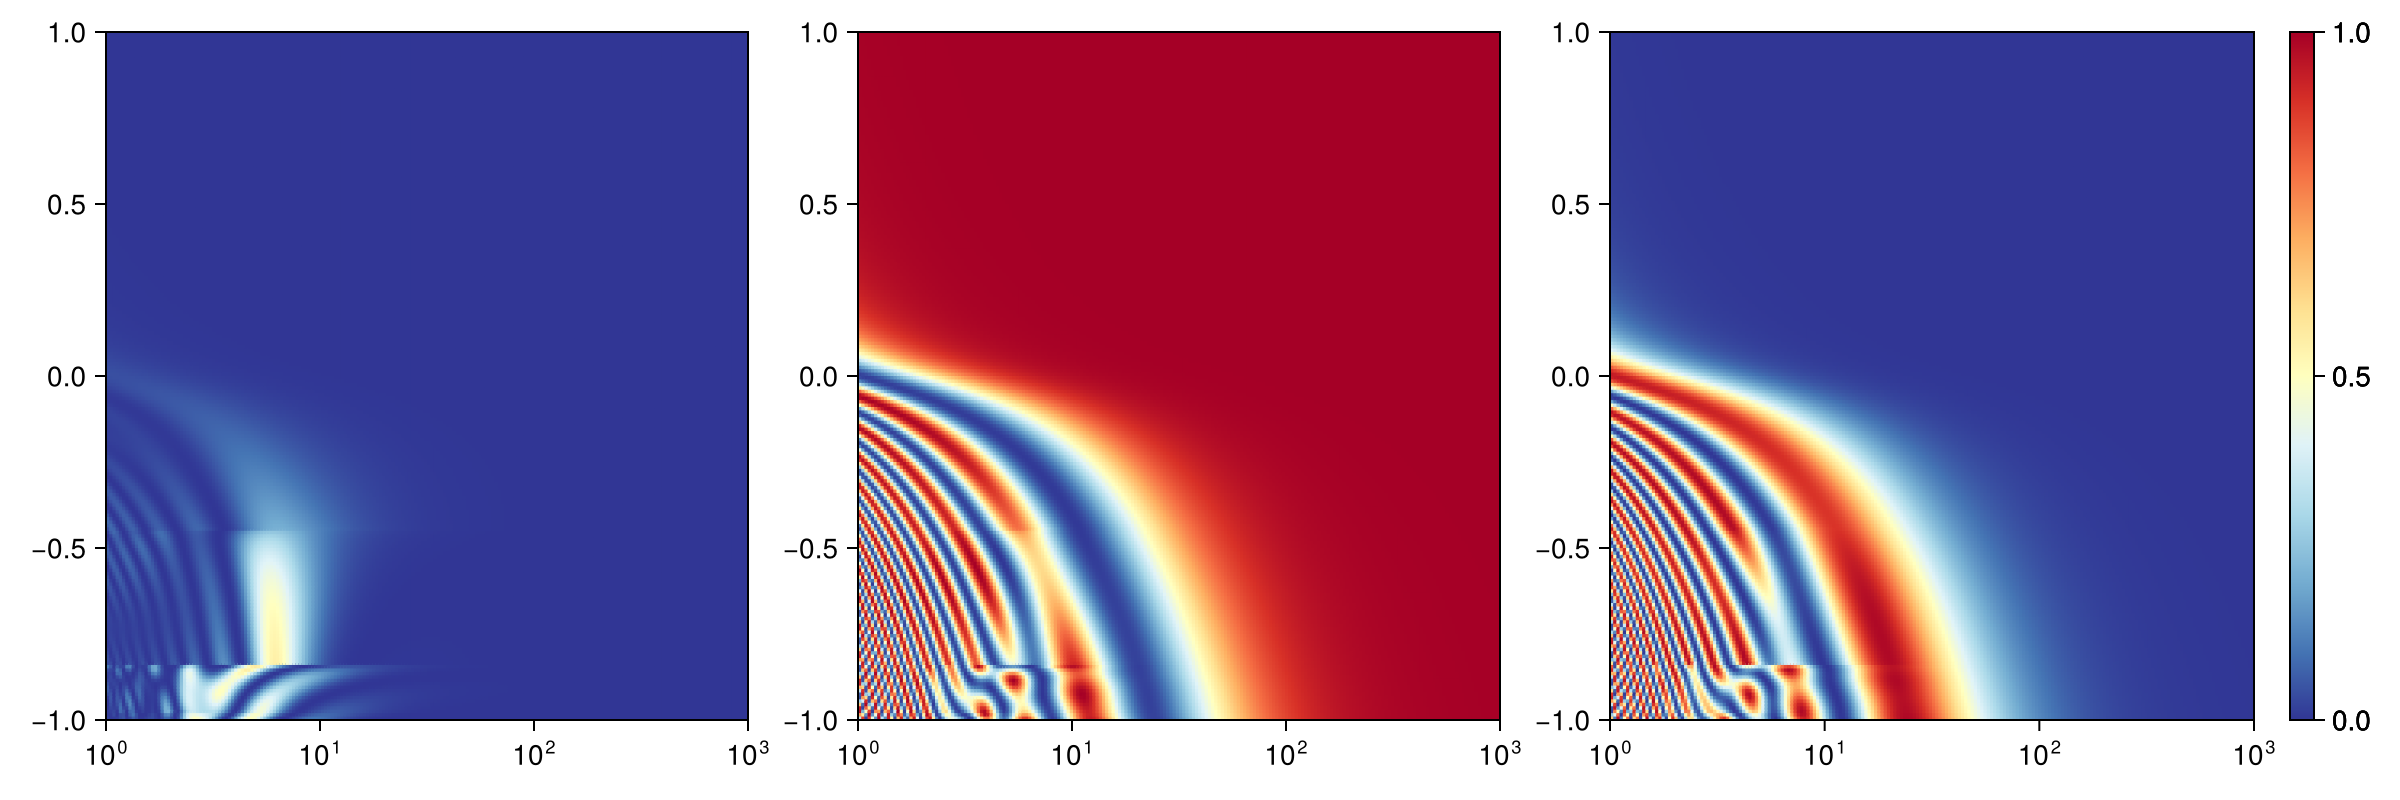

In [35]:
fig = Figure(size=(1200,400))
for i in 1:3
    ax = Axis(fig[1,i], xscale=log10)
    hm = heatmap!(ax, e_bins, cz_bins, p_earth[:, :, 2,i], colormap=Reverse(:RdYlBu), colorrange=(0,1))
    Colorbar(fig[1,4], hm)
end

fig